In [1]:
%load_ext autoreload
%autoreload 2
notebook_fixed_dir = False

In [2]:
# this cell can only be called once
import os
if not notebook_fixed_dir:
    os.chdir('..')
    notebook_fixed_dir = True
print(os.getcwd())

/home/svcl-oowl/brandon/research/sil_consistent_at_inference


In [3]:
import pprint
import glob
from pathlib import Path
import pickle
import random

import torch
from PIL import Image
import numpy as np
from pytorch3d.renderer import look_at_view_transform
import matplotlib.pyplot as plt
import trimesh

from utils import general_utils
from utils import visualization_tools
from utils.eval_utils import eval_metrics
#from evaluation import compute_iou_2d, compute_iou_2d_given_pose, compute_iou_3d, compute_chamfer_L1

In [7]:
shapenet_dir = "/home/svcl-oowl/dataset/ShapeNetCore.v1"
class_id = "03001627"
instance = "cbcc5cd1aec9f3413aa677469bbdd68c"

model_path = os.path.join(shapenet_dir, class_id, instance, "model_watertight.obj")
device = torch.device("cuda:0")
mesh = general_utils.load_untextured_mesh(model_path, device)

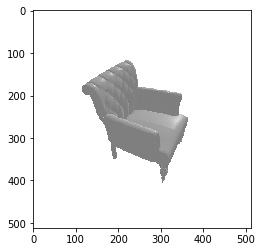

In [21]:
dist = 1.3
elev = 35
azim = 25
R, T = look_at_view_transform(dist, elev, azim) 
render = general_utils.render_mesh(mesh, R, T, device)
plt.imshow(render[0, ..., :3].detach().cpu().numpy())